# CNN to detect skin cancer

Import Required Libraries.

In [1]:
## Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


Import Datasets

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/train',
    image_size=(512, 512),
    batch_size=10,
    label_mode='binary'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/val',
    image_size=(512, 512),
    batch_size=10,
    label_mode='binary'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/test',
    image_size=(512, 512),
    batch_size=10,
    label_mode='binary'
)


Found 400 files belonging to 2 classes.
Found 50 files belonging to 2 classes.
Found 50 files belonging to 2 classes.


Build the CNN model

In [3]:
model = models.Sequential([
    layers.Input(shape=(512, 512, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



Compile the model for training

In [4]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Train the model

In [5]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 650ms/step - accuracy: 0.4851 - loss: 1.0064 - val_accuracy: 0.7200 - val_loss: 0.5319
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 629ms/step - accuracy: 0.7562 - loss: 0.4946 - val_accuracy: 0.8000 - val_loss: 0.9037
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 627ms/step - accuracy: 0.8519 - loss: 0.4249 - val_accuracy: 0.7800 - val_loss: 0.5637
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 627ms/step - accuracy: 0.8827 - loss: 0.3238 - val_accuracy: 0.9000 - val_loss: 0.4671
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 627ms/step - accuracy: 0.8662 - loss: 0.3649 - val_accuracy: 0.8400 - val_loss: 0.8700
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 627ms/step - accuracy: 0.8252 - loss: 0.5230 - val_accuracy: 0.7200 - val_loss: 1.2922
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 625ms/step - accuracy: 0.8420 - loss: 0.4685 - val_accuracy: 0.7600 - val_loss: 0.6618
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 624ms/step - accuracy: 0.8212 - loss: 0.3940 - val_accu

Evaluate the model

Plot the results

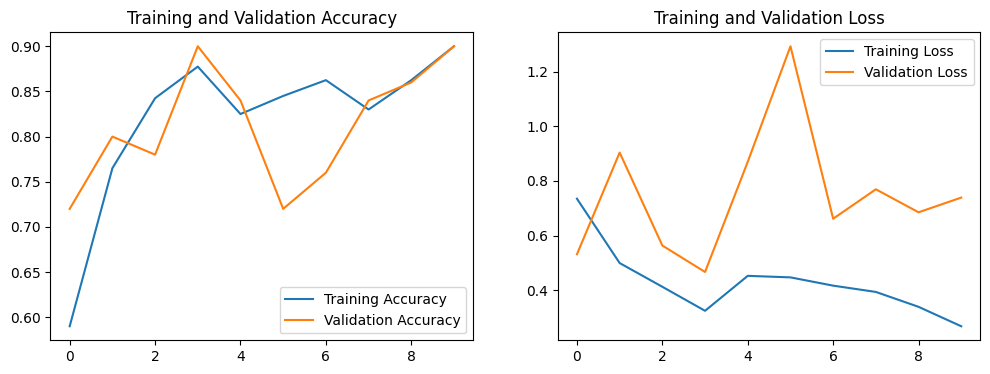

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [7]:
# After training your model...
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.8233 - loss: 0.5257
Test Loss: 0.4644
Test Accuracy: 0.8200
